In [229]:
import time
from builtins import print

# import math
# import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
# from keras.optimizers import Adam
# from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2542345639295683201
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2913966491
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14191738431400812978
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]
Num GPUs Available:  1


In [230]:
import os

os.getcwd()

'D:\\pycharm\\kerass'

In [215]:
datagen = ImageDataGenerator(
    #featurewise_center=True,
     zoom_range=[0.7, 1.3],
     rotation_range= 10 ,
     brightness_range=[0.8,1.8],
     width_shift_range=0.2,
     height_shift_range=0.1,
     # channel_shift_range=100,
     horizontal_flip=False)

In [223]:
dir = 'D:\\resource\horof\\32/11111Black2021-01-14_17-12-01-718_53Z17311-IRN0.bmp'
# dir = 'D:\\resource\horof\\14/Black7_4769111_100_1397-05-13_11-02-50-206_811111_NotComplete_1_Monochrome0.bmp'
pic = load_img(dir)
print(pic)
pic_array = img_to_array(pic)
pic_array = pic_array.reshape((1,) + pic_array.shape)  # Converting into 4 dimension array
pic_array.shape

<PIL.Image.Image image mode=RGB size=32x32 at 0x1D8BAE3E760>


(1, 32, 32, 3)

In [225]:
# batch_size: At a time, how many image should be created.
kames = [ '10', '12', '14', '23', '25', '30', '32']
save_dir = "D:\\resource\horof\\32"
prefix='f'
count = 0
tedad = 1600
# for batch in datagen.flow(pic_array, batch_size=10, save_to_dir=save_dir,
#                           save_prefix=prefix, save_format='bmp'):
#     count += 1
#     if count >= tedad:
#         break

print('Done!')

Done!


In [260]:
path = 'D:\\resource\horof/'
path2 = 'D:\\resource\horof/train/'

files = os.listdir(path2)
print(files)
print(len(files))

for file in files:
    if file == 'train' or file == 'valid' or file == 'test' or file == 'Mapping table.xlsx' or file == 'N':continue
    try:
        print(path+file)
        print(path2 + file)
        # for j in random.sample(glob.glob(path+file+'/*'),int(0.8*len(os.listdir(path+file)))):
        print('train '+file+':',1*len(os.listdir(path+file)))

    except:
        print("Fail!")
        pass

print('Done')

# for file in files:
#     if file == 'train' or file == 'valid' or file == 'test' or file == 'Mapping table.xlsx' or file == 'N': continue
#     os.makedirs(path2 + str(file))

['10', '11', '12', '13', '14', '15', '19', '23', '24', '25', '26', '28', '30', '32', '33', '36', '37', '38', '39', '40', '41']
21
D:\resource\horof/10
D:\resource\horof/train/10
train 10: 0
D:\resource\horof/11
D:\resource\horof/train/11
train 11: 0
D:\resource\horof/12
D:\resource\horof/train/12
train 12: 0
D:\resource\horof/13
D:\resource\horof/train/13
train 13: 0
D:\resource\horof/14
D:\resource\horof/train/14
train 14: 0
D:\resource\horof/15
D:\resource\horof/train/15
train 15: 0
D:\resource\horof/19
D:\resource\horof/train/19
train 19: 0
D:\resource\horof/23
D:\resource\horof/train/23
train 23: 0
D:\resource\horof/24
D:\resource\horof/train/24
train 24: 0
D:\resource\horof/25
D:\resource\horof/train/25
train 25: 0
D:\resource\horof/26
D:\resource\horof/train/26
train 26: 0
D:\resource\horof/28
D:\resource\horof/train/28
train 28: 0
D:\resource\horof/30
D:\resource\horof/train/30
train 30: 0
D:\resource\horof/32
D:\resource\horof/train/32
train 32: 0
D:\resource\horof/33
D:\resour

In [259]:

# for file in files:
#     if file == 'train' or file == 'valid' or file == 'test' or file == 'Mapping table.xlsx' or file == 'N':continue
#     try:
#         for j in random.sample(glob.glob(path+file+'/*'),int(1*len(os.listdir(path+file)))):
#                 shutil.move(j, path2+file)
#         print ('valid '+file+':',len(os.listdir(path2+file)))
#
#     except:
#         print("Fail!")
#         pass

print('Done')

valid 10: 145
valid 11: 191
valid 12: 152
valid 13: 504
valid 14: 155
valid 15: 190
valid 19: 166
valid 23: 161
valid 24: 174
valid 25: 159
valid 26: 168
valid 28: 170
valid 30: 162
valid 32: 154
valid 33: 176
valid 36: 168
valid 37: 180
valid 38: 173
valid 39: 172
valid 40: 159
valid 41: 167
Done


In [266]:
train_path = 'D:\\resource\horof/train'
valid_path = 'D:\\resource\horof/valid'
test_path = 'D:\\resource\horof/test'

category = ['10', '11', '12', '13', '14', '15', '19', '23', '24', '25', '26', '28', '30', '32', '33', '36', '37', '38', '39', '40', '41']

imageDataGen = ImageDataGenerator(rescale=1./255)

train_batches = imageDataGen.flow_from_directory(directory=train_path, target_size=(32,32), color_mode="grayscale", classes=category, batch_size=128)

valid_batches = imageDataGen.flow_from_directory(directory=valid_path, target_size=(32,32), color_mode="grayscale", classes=category, batch_size=128)

test_batches = imageDataGen.flow_from_directory(directory=test_path, target_size=(32,32), color_mode="grayscale",classes=category, batch_size=128, shuffle=False)

Found 30667 images belonging to 21 classes.
Found 3834 images belonging to 21 classes.
Found 3846 images belonging to 21 classes.


<class 'numpy.ndarray'>
(64, 32, 32, 1)


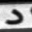

In [262]:
imgs, labels = next(train_batches)
print(type(imgs))
print(imgs.shape)
# print(imgs[1][0][0])
img = array_to_img(imgs[9])
img

In [268]:
model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding = 'same', input_shape=(32,32,1)),
    layers.MaxPool2D(pool_size=(2, 2), strides=2),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPool2D(pool_size=(2, 2), strides=2),
    layers.Flatten(),
    layers.Dense(units=21, activation='softmax')
])
print("Done!")

Done!


In [269]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 21)                86037     
Total params: 105,365
Trainable params: 105,365
Non-trainable params: 0
________________________________________________

In [270]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [271]:
hist = model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)
print('Done!')

Epoch 1/10
240/240 - 482s - loss: 0.6544 - accuracy: 0.8176 - val_loss: 0.2443 - val_accuracy: 0.9364
Epoch 2/10
240/240 - 14s - loss: 0.1587 - accuracy: 0.9603 - val_loss: 0.1339 - val_accuracy: 0.9703
Epoch 3/10
240/240 - 13s - loss: 0.0941 - accuracy: 0.9807 - val_loss: 0.0991 - val_accuracy: 0.9789
Epoch 4/10
240/240 - 13s - loss: 0.0696 - accuracy: 0.9866 - val_loss: 0.0907 - val_accuracy: 0.9812
Epoch 5/10
240/240 - 13s - loss: 0.0547 - accuracy: 0.9900 - val_loss: 0.0739 - val_accuracy: 0.9857
Epoch 6/10
240/240 - 15s - loss: 0.0461 - accuracy: 0.9911 - val_loss: 0.0656 - val_accuracy: 0.9883
Epoch 7/10
240/240 - 13s - loss: 0.0387 - accuracy: 0.9929 - val_loss: 0.0715 - val_accuracy: 0.9862
Epoch 8/10
240/240 - 13s - loss: 0.0335 - accuracy: 0.9940 - val_loss: 0.0624 - val_accuracy: 0.9893
Epoch 9/10
240/240 - 12s - loss: 0.0317 - accuracy: 0.9946 - val_loss: 0.0646 - val_accuracy: 0.9867
Epoch 10/10
240/240 - 12s - loss: 0.0283 - accuracy: 0.9950 - val_loss: 0.0683 - val_accur

In [272]:
import os.path

if os.path.isfile("D:\pycharm\kerass\models") is False:
    model.save("D:\pycharm\kerass\models\horof.h5")
    print("Model Saved")

Model Saved


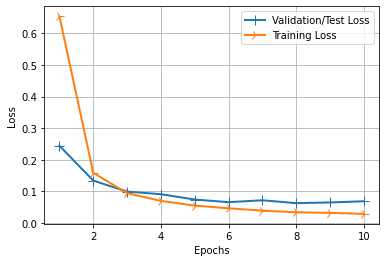

In [273]:
# Plotting our loss charts
import matplotlib.pyplot as plt

# Use the History object we created to get our saved performance results
history_dict = hist.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [275]:
t = time.time()
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=1)
print(time.time()-t)

31/31 [==============================] - 1s 45ms/step
1.4791903495788574


In [276]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [277]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

Confusion matrix, without normalization
[[144   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0 191   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   2 150   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   1   1 496   1   0   1   0   0   0   0   0   0   0   1   0   0   2
    1   0   0]
 [  1   0   0   0 153   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0 190   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0 166   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   1   0 159   0   0   0   0   0   0   1   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0 174   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0 159   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   1   0   5   0 161   0   0   0   0   0   0 

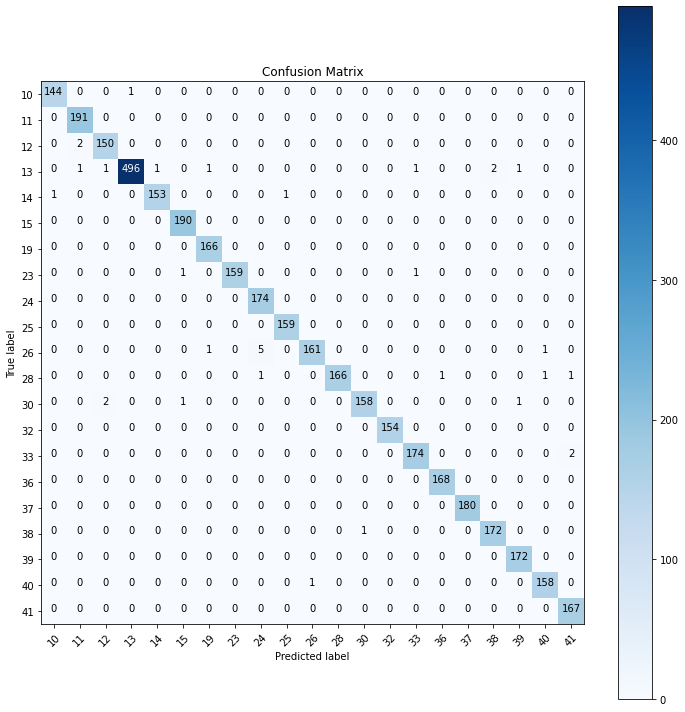

In [278]:
cm_plot_labels = ['10', '11', '12', '13', '14', '15', '19', '23', '24', '25', '26', '28', '30', '32', '33', '36', '37', '38', '39', '40', '41']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
import cv2
imgs, labels = next(test_batches)
print(type(imgs))
print(imgs.shape)
# print(imgs[1])
imgs[1]
for i in imgs:
    # img = array_to_img(imgs[i])
    # pic_array = i.reshape((1,) + pic_array.shape)
    x = np. array(i)
    x = cv2.resize(x,(32,32))
    x = np.reshape(x,(32,32,1))
    x = np.expand_dims(x, axis=0)
    predictTest = model.predict(x=x, steps=1, verbose=1)
    print(np.round(predictTest))
    from matplotlib import pyplot as plt
    plt.imshow(i, interpolation='nearest')
    plt.show()

In [318]:
import cv2
import PIL
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import time

samplePath = 'D:\\resource\horof/test/26'
zahra = random.sample(glob.glob('D:\\resource\Char\pelakTrainer\\test\*'),int(1*len(os.listdir('D:\\resource\Char\pelakTrainer\\test'))))


# print(type(zahra))
# print(zahra)
amirali = []
for image_path in os.listdir(samplePath):
    print("--------------------------------")
    # try:
        # predicting images
        # print(image_path)
    path = os.path.join(samplePath, image_path)

    img = PIL. Image. open(path)
    x = np. array(img)
    x = cv2.resize(x,(32,32))
    x = np.reshape(x,(32,32,1))
    # x = np. array(img)

    # img = image.load_img(path, target_size=(128, 128))
    # x = image.img_to_array(img)

    # plt.imshow(x)
    # plt.show()
    x = np.expand_dims(x, axis=0)
    # images = np.vstack([x])
    now = time.time()
    classes = model.predict(x/255)
    print("TIME : ",time.time()-now)
    print(np.round(classes))
    # if classes[0]<0.5:
    #     amirali.append(image_path)
    #     print(image_path + " is a pelak")
    # else:
    #     print(image_path + " is a notPelak")
    # # except:
    #   print('false')
    #   pass
print(amirali)
# image = PIL. Image. open(testt)
# image_array = np. array(image)
# print(image_array.shape)

TIME :  0.04885268211364746
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
--------------------------------
TIME :  0.05186057090759277
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
--------------------------------
TIME :  0.04901576042175293
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
--------------------------------
TIME :  0.04484415054321289
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
--------------------------------
TIME :  0.04504251480102539
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
--------------------------------
TIME :  0.04467034339904785
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
--------------------------------
TIME :  0.04846811294555664
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
--------------------------------
TIME :  0.04585742950439453
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
---------